In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as pyt
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


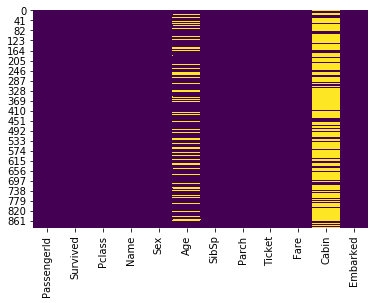

In [4]:
sn.heatmap(train.isnull(),cbar=False,cmap='viridis')

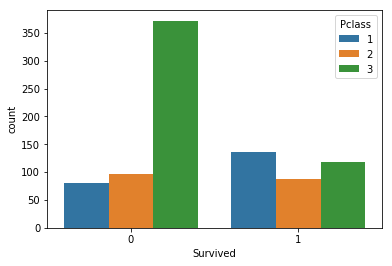

In [5]:
sn.countplot(x='Survived',hue='Pclass',data=train)

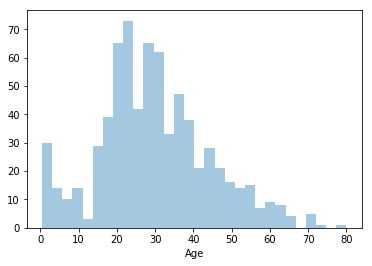

In [6]:
sn.distplot(train['Age'].dropna(),kde=False,bins=30)

In [152]:
pyt.figure(figsize=(10,7))
sn.boxplot(x='Pclass',y='Age',data=train)

ValueError: Could not interpret input 'survived'

In [8]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
        
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        if Pclass==2:
            return 28
        else:
            return 22

    else:
        return Age

In [9]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [10]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      22.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     28.0
18     31.0
19     22.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     22.0
27     19.0
28     22.0
29     22.0
       ... 
861    21.0
862    48.0
863    22.0
864    24.0
865    42.0
866    27.0
867    31.0
868    22.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    22.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    22.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

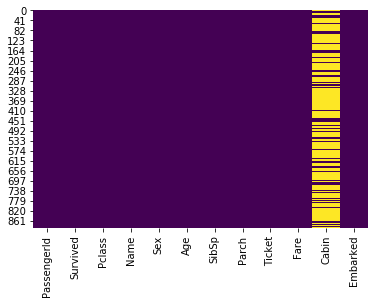

In [11]:
sn.heatmap(train.isnull(),cbar=False,cmap='viridis')

In [12]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [13]:
Sex=pd.get_dummies(train['Sex'],drop_first=True)

In [14]:
pd.concat([train,Sex,embark],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,22.0,0,0,330877,8.4583,NaN,Q,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,0,0


In [63]:
train.drop(['Fare'],axis=1,inplace=True)

In [64]:
train.drop(['PassengerId'],axis=1,inplace=True)

ValueError: labels ['PassengerId'] not contained in axis

In [65]:
train.head()


,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0


In [ ]:
train.drop()

In [66]:
X=train.drop(['Survived'],axis=1)
Y=train['Survived']

In [67]:
#from sklearn.cross_validation import train_test_split

In [68]:
test= pd.read_csv('test.csv')
test.drop(['Sex','Ticket','Embarked','Cabin','Name'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)

In [69]:
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)


In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logmodel=LogisticRegression()

In [72]:
logmodel.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
test= pd.read_csv('test.csv')


In [28]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
test.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Sex'],axis=1,inplace=True)

ValueError: labels ['PassengerId' 'Name' 'Ticket' 'Cabin' 'Embarked' 'Sex'] not contained in axis

In [78]:
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)


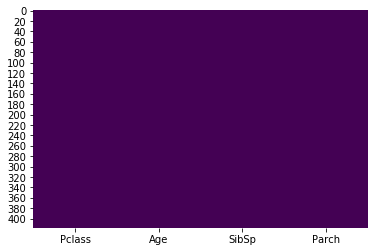

In [79]:
sn.heatmap(test.isnull(),cbar=False,cmap='viridis')

In [57]:
#predictions=logmodel.predict(test)

In [74]:
test.drop(['Fare'],axis=1,inplace=True)

In [76]:
test.head()

,Pclass,Age,SibSp,Parch
0,3,34.5,0,0
1,3,47.0,1,0
2,2,62.0,0,0
3,3,27.0,0,0
4,3,22.0,1,1


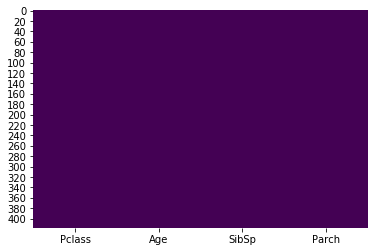

In [80]:
sn.heatmap(test.isnull(),cbar=False,cmap='viridis')

In [81]:
predictions=logmodel.predict(test)

In [83]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [114]:
output=pd.read_csv('test.csv')

In [115]:
k=pd.DataFrame(predictions,columns=['survived'])

In [116]:
k.count()

survived    418
dtype: int64

In [117]:
out=output['PassengerId']

In [118]:
out

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [120]:
final=pd.concat([out,k],axis=1)

In [145]:
final.to_csv("final.csv",index=False)

In [133]:
import csv
import string

In [146]:
a=pd.read_csv('final.csv')

In [149]:
a.isnull().sum()


PassengerId    0
survived       0
dtype: int64